https://huggingface.co/learn/audio-course/en/chapter6/pre-trained_models (ref)

In [ ]:
# !pip install datasets

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, SpeechT5HifiGan
import torch
from datasets import load_dataset
import librosa
import matplotlib.pyplot as plt
import IPython as ipy

In [ ]:
processor = SpeechT5Processor.from_pretrained('microsoft/speecht5_tts')

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained('microsoft/speecht5_tts')


In [ ]:
embedding_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split='validation')
embedding_dataset

Dataset({
    features: ['filename', 'xvector'],
    num_rows: 7931
})

In [ ]:
speaker_embedding = torch.tensor(embedding_dataset[7306]['xvector']).unsqueeze(0)

In [ ]:
text = "Don't count the days, make the days count. Hope you are doing well!"
# text = "Hope you are doing well!"
inputs = processor(text=text, return_tensors='pt')
inputs["input_ids"].shape

torch.Size([1, 69])

In [ ]:
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
spectogram = model.generate_speech(inputs["input_ids"], speaker_embedding)

In [ ]:
spectogram.shape

torch.Size([236, 80])

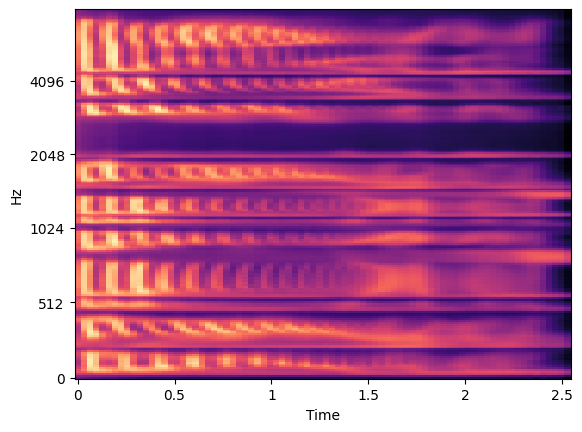

In [ ]:
librosa.display.specshow(spectogram.cpu().numpy(),
                         x_axis='time',
                         y_axis='mel',
                         sr=16000);

In [ ]:
speech = model.generate_speech(inputs["input_ids"], speaker_embedding, vocoder=vocoder)
speech.shape

torch.Size([59904])

In [ ]:
ipy.display.Audio(speech, rate=16000)

In [ ]:
from transformers import BarkModel, BarkProcessor

In [ ]:
model = BarkModel.from_pretrained('suno/bark-small')
processor = BarkProcessor.from_pretrained('suno/bark-small')

In [ ]:
inputs = processor("this is a test!", voice_preset="v2/en_speaker_3")

In [ ]:
speech_output = model.generate(**inputs).cpu().numpy()
speech_output.shape

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


(1, 76800)

In [ ]:
ipy.display.Audio(speech_output, rate=24000)

In [ ]:
inputs = processor(
    "[clears throat] This is a test ... and I just took a long pause.",
    voice_preset="v2/fr_speaker_1",
)
speech_output = model.generate(**inputs).cpu().numpy()
speech_output.shape

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


(1, 190720)

In [ ]:
ipy.display.Audio(speech_output, rate=24000)

In [ ]:
from transformers import VitsModel, VitsTokenizer

In [ ]:
model = VitsModel.from_pretrained("facebook/mms-tts-tam")
tokenizer = VitsTokenizer.from_pretrained("facebook/mms-tts-tam")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/mms-tts-tam were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/721 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [ ]:
text_example = (
    "இதை வங்கி கணக்குடன் கட்டாயமாக இணைக்க வேண்டும். அதே போல் ஆதார் அட்டையுடன் கட்டாயமாக இணைக்க வேண்டும் என்ற உத்தரவும் உள்ளது. இது ஒரு தனித்துவமான 10 இலக்க எண்ணெழுத்து எண்ணாகும். அனைத்து வரி செலுத்துவோருக்கும் பான் கார்டு கட்டாயம்."
    )

In [ ]:
inputs = tokenizer(text_example, return_tensors='pt')
input_ids = inputs['input_ids']
input_ids.shape

torch.Size([1, 445])

In [ ]:
with torch.no_grad():
  outputs = model(input_ids)

speech = outputs["waveform"]

In [ ]:
ipy.display.Audio(speech, rate=18000)